# Proyecto final
Juan Sebastián Ruiz Caro

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('fast')

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.preprocessing import MinMaxScaler

In [349]:
from datetime import date, time, datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
data = pd.read_csv('/content/Casos_Bogota.csv', sep=','  , engine='python', parse_dates=True)

In [351]:
data.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN


In [352]:
data.columns

Index(['fecha reporte web', 'ID de caso', 'Fecha de notificación',
       'Código DIVIPOLA departamento', 'Nombre departamento',
       'Código DIVIPOLA municipio', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicación del caso', 'Estado', 'Código ISO del país',
       'Nombre del país', 'Recuperado', 'Fecha de inicio de síntomas',
       'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación',
       'Tipo de recuperación', 'Pertenencia étnica',
       'Nombre del grupo étnico'],
      dtype='object')

In [353]:
data_1 = data[data['Nombre departamento'] == 'BOGOTA']

## Análisis exploratorio de datos

In [354]:
Datos = data_1.filter(['Edad', 'Sexo','Tipo de contagio', 'Ubicación del caso', 'Estado'])

### Edad
En promedio, los contagiados en la ciudad de Bogota tiene una edad de $38.57$ años. El individuo contagiado con menos edad tuvo un año, en contra posición, la persona con mas edad que contrago el virus tiene $114$ años. Ademas, la distribución de las edades presenta asimetria positiva, es decir, es mas frecuente encontrar dentro de los contagiados personas con edades entre los $20$ y $40$ años.

In [355]:
pd.DataFrame(Datos['Edad'].describe().round(2))

,Edad
count,1460569.00
mean,38.57
std,17.65
min,1.00
25%,26.00
50%,36.00
75%,51.00
max,114.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


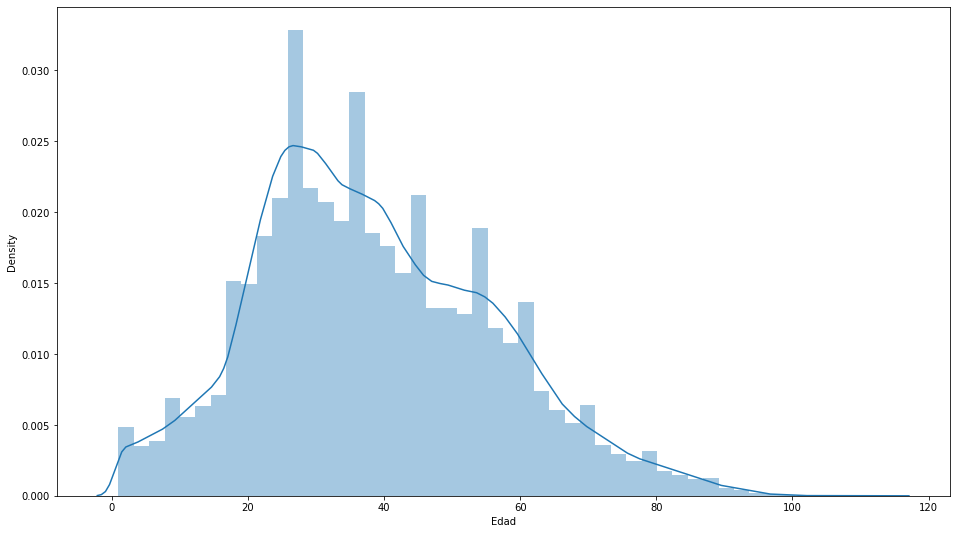

In [356]:
sns.distplot(Datos['Edad'])

### Sexo
En cuanto al sexo de los contagiados en la ciudad de Bogotá, observamos que se presenta de manera similar tanto en el sexo masculino como femenino, aunque levemente se presenta un poco mas en el sexo femenino con un $53.454$% de los casos.

In [357]:
pd.DataFrame(round(100*Datos['Sexo'].value_counts()/Datos['Sexo'].value_counts().sum(),3))

,Sexo
F,53.454
M,46.545
m,0.000
f,0.000


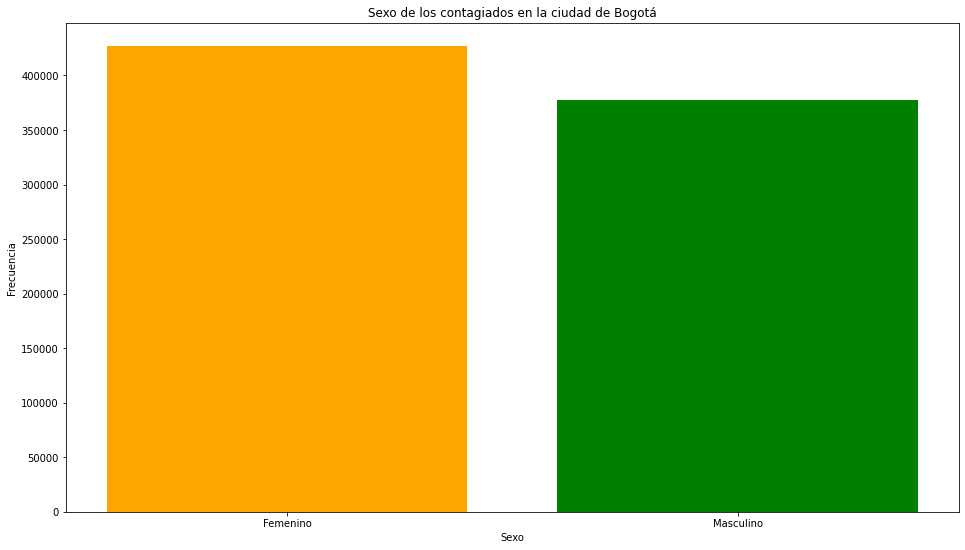

In [358]:
plt.bar(['Femenino', 'Masculino'], [427154 + 3 , 377545 + 2], color = ['orange','green'])
plt.title('Sexo de los contagiados en la ciudad de Bogotá')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

### Tipo de contagio

El tipo de contagio mas frecuente dentro de los contagiados es en estudio con un $48.47$%, lo que quiere decir que en una parte importante, se desconoce el tipo de contagio de los que contraen el virus, seguido de relacionado con un $36.14$%, unicamente el $0.06$% de los casos son importados.

In [359]:
Datos['Tipo de contagio'].value_counts()

En estudio     708003
Relacionado    527806
Comunitaria    223821
Importado         939
Name: Tipo de contagio, dtype: int64

In [360]:
round(100*Datos['Tipo de contagio'].value_counts()/Datos['Tipo de contagio'].value_counts().sum(),2)

En estudio     48.47
Relacionado    36.14
Comunitaria    15.32
Importado       0.06
Name: Tipo de contagio, dtype: float64

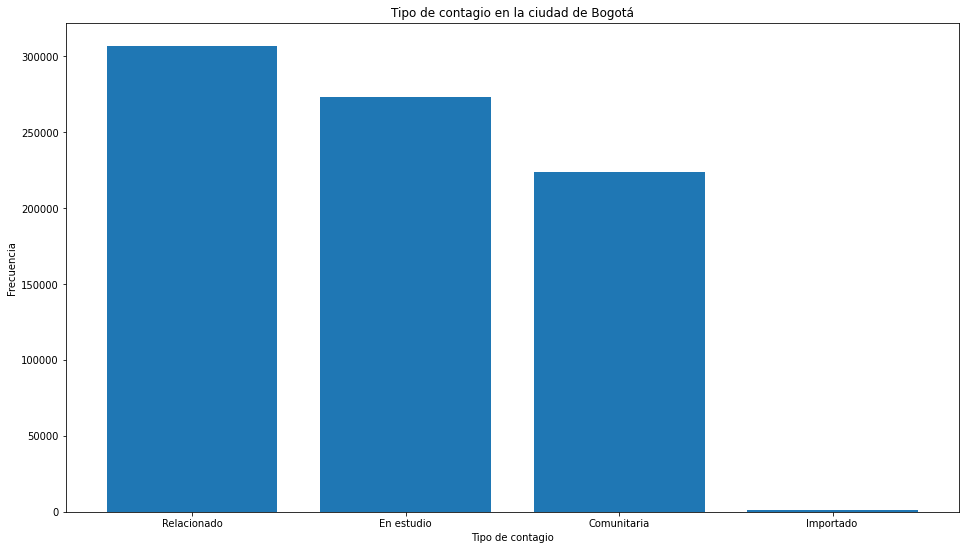

In [361]:
plt.bar(['En estudio','Relacionado',, 'Comunitaria', 'Importado '], [708003, 527806, 223821,939 ])
plt.title('Tipo de contagio en la ciudad de Bogotá')
plt.xlabel('Tipo de contagio')
plt.ylabel('Frecuencia')
plt.show()

### Ubicación del caso

De los casos registrados, el $98.08$% se encuentran en su casa, $1.9$% fallecieron, unicamente el $0.01$% se encuentra en UCI.


In [362]:
pd.DataFrame(round(100*Datos['Ubicación del caso'].value_counts()/Datos['Ubicación del caso'].value_counts().sum(),2))

,Ubicación del caso
Casa,98.04
Fallecido,1.90
casa,0.04
Hospital,0.01
Hospital UCI,0.01


In [363]:
Datos['Ubicación del caso'].value_counts()

Casa            1427285
Fallecido         27718
casa                558
Hospital            111
Hospital UCI         93
Name: Ubicación del caso, dtype: int64

In [364]:
Datos['Ubicación del caso'].value_counts()

Casa            1427285
Fallecido         27718
casa                558
Hospital            111
Hospital UCI         93
Name: Ubicación del caso, dtype: int64

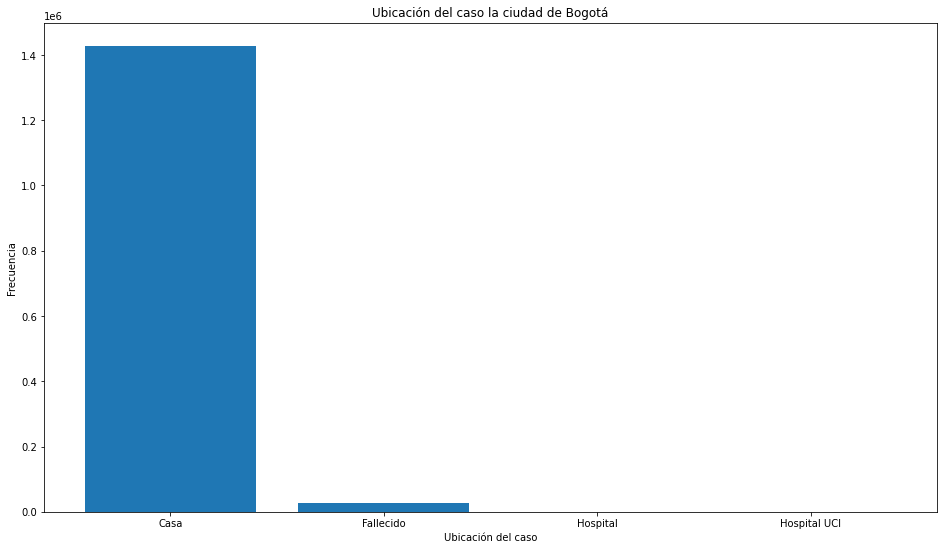

In [365]:
plt.bar(['Casa', 'Fallecido', 'Hospital', 'Hospital UCI' ], [1427285+558,27718,111,93])
plt.title('Ubicación del caso la ciudad de Bogotá')
plt.xlabel('Ubicación del caso')
plt.ylabel('Frecuencia')
plt.show()

In [366]:
Casos = data_1['fecha reporte web']

In [367]:
Casos = Casos.str[:-7]

In [368]:
Casos = pd.DataFrame(Casos) 
Casos = pd.DataFrame(Casos.value_counts()) ; Casos

,0
fecha reporte web,
24/6/2021,15569
17/6/2021,12493
19/6/2021,11729
1/7/2021,11545
30/6/2021,11493
...,...
22/3/2020,4
12/3/2020,2
11/3/2020,2


In [369]:
Casos = Casos.rename_axis(['0']).reset_index() ; Casos

,0,0
0,24/6/2021,15569
1,17/6/2021,12493
2,19/6/2021,11729
3,1/7/2021,11545
4,30/6/2021,11493
...,...,...
618,22/3/2020,4
619,12/3/2020,2
620,11/3/2020,2
621,13/3/2020,1


In [370]:
Casos.columns = ['Fecha', 'f']

In [371]:
Casos['Fecha'] = Casos['Fecha'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9'],['01', '02', '03', '04', '05', '06', '07', '08', '09']) ; Casos

,Fecha,f
0,24/6/2021,15569
1,17/6/2021,12493
2,19/6/2021,11729
3,1/7/2021,11545
4,30/6/2021,11493
...,...,...
618,22/3/2020,4
619,12/3/2020,2
620,11/3/2020,2
621,13/3/2020,1


In [372]:
Fecha_1 = Casos['Fecha'].str.split('/', expand = True)
Fecha_1.columns = ['Dia', 'Mes', 'Año'] ; Fecha_1

,Dia,Mes,Año
0,24,6,2021
1,17,6,2021
2,19,6,2021
3,1,7,2021
4,30,6,2021
...,...,...,...
618,22,3,2020
619,12,3,2020
620,11,3,2020
621,13,3,2020


In [373]:
Fecha_1['Mes'] = Fecha_1['Mes'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
Fecha_1['Dia'] = Fecha_1['Dia'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9'],['01', '02', '03', '04', '05', '06', '07', '08', '09'])

In [374]:
Fecha_1

,Dia,Mes,Año
0,24,06,2021
1,17,06,2021
2,19,06,2021
3,01,07,2021
4,30,06,2021
...,...,...,...
618,22,03,2020
619,12,03,2020
620,11,03,2020
621,13,03,2020


In [375]:
Fecha_1['Fecha final'] = Fecha_1['Mes'] + "/" + Fecha_1['Dia'] + '/' + Fecha_1['Año'] ; Fecha_1

,Dia,Mes,Año,Fecha final
0,24,06,2021,06/24/2021
1,17,06,2021,06/17/2021
2,19,06,2021,06/19/2021
3,01,07,2021,07/01/2021
4,30,06,2021,06/30/2021
...,...,...,...,...
618,22,03,2020,03/22/2020
619,12,03,2020,03/12/2020
620,11,03,2020,03/11/2020
621,13,03,2020,03/13/2020


In [376]:
Serie_tiempo = pd.concat([Casos,Fecha_1['Fecha final']], axis=1) ; Serie_tiempo

,Fecha,f,Fecha final
0,24/6/2021,15569,06/24/2021
1,17/6/2021,12493,06/17/2021
2,19/6/2021,11729,06/19/2021
3,1/7/2021,11545,07/01/2021
4,30/6/2021,11493,06/30/2021
...,...,...,...
618,22/3/2020,4,03/22/2020
619,12/3/2020,2,03/12/2020
620,11/3/2020,2,03/11/2020
621,13/3/2020,1,03/13/2020


In [377]:
Serie_tiempo

,Fecha,f,Fecha final
0,24/6/2021,15569,06/24/2021
1,17/6/2021,12493,06/17/2021
2,19/6/2021,11729,06/19/2021
3,1/7/2021,11545,07/01/2021
4,30/6/2021,11493,06/30/2021
...,...,...,...
618,22/3/2020,4,03/22/2020
619,12/3/2020,2,03/12/2020
620,11/3/2020,2,03/11/2020
621,13/3/2020,1,03/13/2020


In [378]:
Serie_tiempo['Fecha final'] = pd.to_datetime(Serie_tiempo['Fecha final']) ; Serie_tiempo
Serie_tiempo = Serie_tiempo.drop(['Fecha'], axis = 1)
Serie_tiempo = Serie_tiempo.sort_values(by = 'Fecha final')

In [379]:
Serie_tiempo.columns = ['Casos', 'Fecha']

In [380]:
df = Serie_tiempo

In [381]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [382]:
df.columns

Index(['Casos', 'Fecha'], dtype='object')

In [383]:
Serie_tiempo.set_index('Fecha', inplace=True)

In [384]:
df

,Casos
Fecha,
2020-03-06,1
2020-03-11,2
2020-03-12,2
2020-03-13,1
2020-03-14,10
...,...
2021-11-18,267
2021-11-19,355
2021-11-20,347


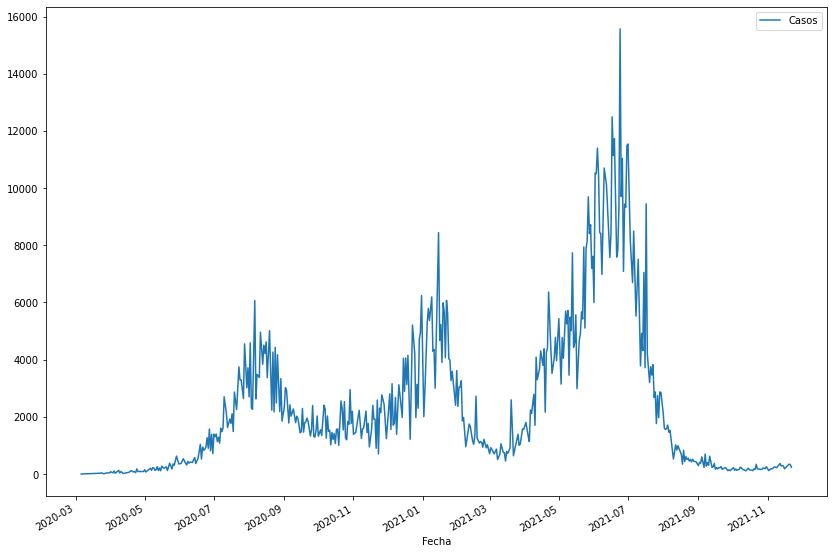

In [385]:
Serie_tiempo.plot(kind = 'line', figsize= (14,10))

In [ ]:
# df['Fecha'] = pd.to_datetime(df['Fecha'])

In [387]:
print(df.index.min())
print(df.index.max())

2020-03-06 00:00:00
2021-11-22 00:00:00


In [ ]:
df.describe()

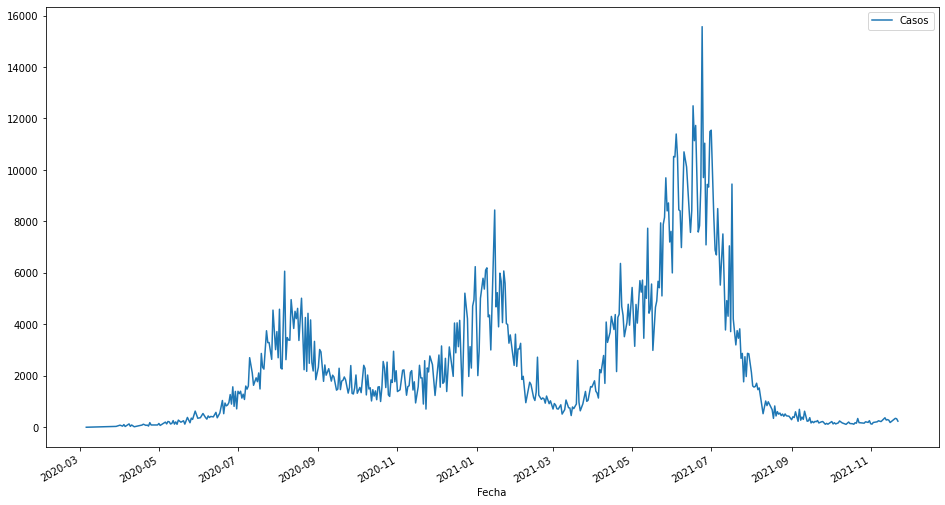

In [389]:
df.plot()

## Aprendizaje profundo

In [390]:
PASOS = 9
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
values = df.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) 
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
9,-1.000000,-0.999872,-0.999872,-1.000000,-0.998844,-0.998844,-0.999358,-0.999229,-0.999486,-0.999101
10,-0.999872,-0.999872,-1.000000,-0.998844,-0.998844,-0.999358,-0.999229,-0.999486,-0.999101,-0.996660
11,-0.999872,-1.000000,-0.998844,-0.998844,-0.999358,-0.999229,-0.999486,-0.999101,-0.996660,-0.999486
12,-1.000000,-0.998844,-0.998844,-0.999358,-0.999229,-0.999486,-0.999101,-0.996660,-0.999486,-0.999615
13,-0.998844,-0.998844,-0.999358,-0.999229,-0.999486,-0.999101,-0.996660,-0.999486,-0.999615,-0.996403


In [391]:
values = reframed.values
n_train_days = 105 - (30 + PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(66, 1, 9) (66,) (548, 1, 9) (548,)


In [392]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [395]:
EPOCHS = 100

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1, 9)              90        
                                                                 
 flatten_4 (Flatten)         (None, 9)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 10        
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 33ms/step - loss: 0.8576 - mse: 0.7379 - val_loss: 0.4641 - val_mse: 0.2617
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 0.6776 - mse: 0.4614 - val_loss: 0.3436 - val_mse: 0.1486
Epoch 3/100
8/8 [==============================] - 0s 25ms/s

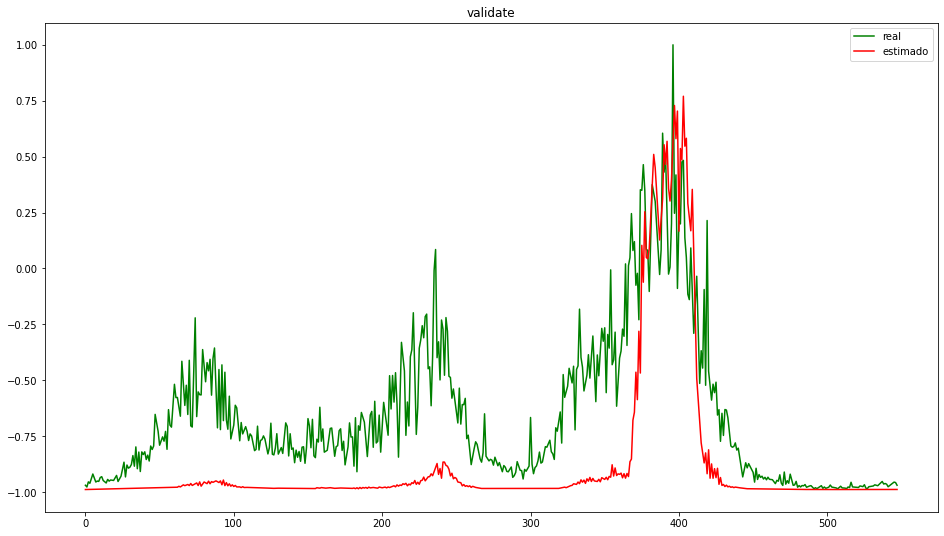

In [396]:
results = model.predict(x_val)
plt.plot(range(len(y_val)),y_val,c='g',label='real')
plt.plot(range(len(results)),results,c='r',label='estimado')
plt.title('validate')
plt.legend(loc='best')